In [5]:
import matplotlib.pyplot as plt
import gensim
import numpy as np
import spacy

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import os, re, operator, warnings
#warnings.filterwarnings('ignore')  # Let's not pay heed to them right now
%matplotlib inline

In [6]:
# Set file names for train and test data Using he Lee corpus data from Gensim
test_data_dir = '{}'.format(os.sep).join([gensim.__path__[0], 'test', 'test_data'])
lee_train_file = test_data_dir + os.sep + 'lee_background.cor'
lee_test_file = test_data_dir + os.sep + 'lee.cor'
text = open(lee_train_file).read()

In [7]:
text

'Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year\'s Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at th

In [9]:
from spacy.en import English
nlp = spacy.load("en")

In [10]:
my_stop_words = [u'say', u'\'s', u'Mr', u'be', u'said', u'says', u'saying']
for stopword in my_stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

In [11]:
doc = nlp(text)

In [12]:
doc

Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year's Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at this

In [13]:
# we add some words to the stop word list
texts, article = [], []
for w in doc:
    # if it's not a stop word or punctuation mark, add it to our article!
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num:
        # we add the lematized version of the word
        article.append(w.lemma_)
    # if it's a new line, it means we're onto our next document
    if w.text == '\n':
        texts.append(article)
        article = []

In [16]:
texts[0]

['hundred',
 'people',
 'force',
 'vacate',
 'home',
 'southern',
 'highlands',
 'new',
 'south',
 'wales',
 'strong',
 'wind',
 'today',
 'push',
 'huge',
 'bushfire',
 'town',
 'hill',
 'new',
 'blaze',
 'near',
 'goulburn',
 'south',
 'west',
 'sydney',
 'force',
 'closure',
 'hume',
 'highway',
 '4:00pm',
 'aedt',
 'marked',
 'deterioration',
 'weather',
 'storm',
 'cell',
 'move',
 'east',
 'blue',
 'mountains',
 'force',
 'authority',
 'decision',
 'evacuate',
 'people',
 'home',
 'outlying',
 'street',
 'hill',
 'new',
 'south',
 'wales',
 'southern',
 'highland',
 'estimate',
 'resident',
 'leave',
 'home',
 'nearby',
 'mittagong',
 'new',
 'south',
 'wales',
 'rural',
 'fire',
 'service',
 'weather',
 'condition',
 'cause',
 'fire',
 'burn',
 'finger',
 'formation',
 'ease',
 'fire',
 'unit',
 'hill',
 'optimistic',
 'defend',
 'property',
 'blaze',
 'burn',
 'new',
 'year',
 'eve',
 'new',
 'south',
 'wales',
 'fire',
 'crew',
 'call',
 'new',
 'fire',
 'gunning',
 'south',
 

In [17]:
article[0]

'australia'

In [18]:
bigram = gensim.models.Phrases(texts)

In [19]:
bigram

In [20]:
texts = [bigram[line] for line in texts]

In [21]:
texts

[['hundred',
  'people',
  'force',
  'vacate',
  'home',
  'southern',
  'highlands',
  'new_south',
  'wales',
  'strong',
  'wind',
  'today',
  'push',
  'huge',
  'bushfire',
  'town',
  'hill',
  'new',
  'blaze',
  'near',
  'goulburn',
  'south',
  'west',
  'sydney',
  'force',
  'closure',
  'hume',
  'highway',
  '4:00pm',
  'aedt',
  'marked',
  'deterioration',
  'weather',
  'storm',
  'cell',
  'move',
  'east',
  'blue_mountains',
  'force',
  'authority',
  'decision',
  'evacuate',
  'people',
  'home',
  'outlying',
  'street',
  'hill',
  'new_south',
  'wales',
  'southern',
  'highland',
  'estimate',
  'resident',
  'leave',
  'home',
  'nearby',
  'mittagong',
  'new_south',
  'wales',
  'rural_fire',
  'service',
  'weather_condition',
  'cause',
  'fire_burn',
  'finger',
  'formation',
  'ease',
  'fire',
  'unit',
  'hill',
  'optimistic',
  'defend',
  'property',
  'blaze',
  'burn',
  'new',
  'year',
  'eve',
  'new_south',
  'wales',
  'fire',
  'crew',

In [36]:
set([w.label_ for w in doc.ents])

{'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

In [38]:
[ent for ent in doc.ents if ent.label_ == 'GPE']

[Goulburn,
 Sydney,
 South Wales,
 South Wales,
 Goulburn,
 Sydney,
 Illawarra,
 Sydney,
 India,
 India,
 Pakistan,
 Pakistan,
 Karachi,
 India,
 India,
 Pakistan,
 New South Wales,
 Tasmania,
 Argentina,
 Argentina,
 Argentina,
 Wollongong Hospital,
 Sydney,
 The Illawarra Area Health Service,
 Australia,
 Kabul,
 Australia,
 Britain,
 Afghanistan,
 The United States,
 France,
 Perth,
 US,
 Melbourne,
 Sydney,
 Appin,
 Sydney,
 Glenbrook,
 Bulaburra,
 Cessnock,
 Newcastle,
 Grafton,
 New South Wales,
 Sydney,
 Wilton,
 Bulli,
 Appin,
 Bulli Tops,
 Sydney,
 Ergon,
 Brisbane,
 Toowoomba,
 Boonah,
 Brisbane,
 Peru,
 Lima,
 Peru,
 Peru,
 Pakistan,
 India,
 Pakistan,
 Pakistan,
 Pakistan,
 Pakistan,
 Pakistan,
 Pakistan,
 Pakistan,
 The United States,
 India,
 Pakistan,
 India,
 India,
 Nepal,
 India,
 India,
 Pakistan,
 India,
 Pakistan,
 Pakistan,
 Pakistan,
 Pakistan,
 Kabul,
 Kabul,
 Yunis Kanooni,
 Kabul,
 Gaza Strip,
 Nitzanit,
 the Gaza Strip,
 Alei Sinai,
 Sydney,
 Sydney,
 Tasmani

In [22]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [39]:
set([ent.string for ent in doc.ents if ent.label_ == 'NORP'])

{'14-Australians',
 '50-year ',
 'ACT ',
 'Aboriginal ',
 'Afghan ',
 'Afghani ',
 'Afghans ',
 'American',
 'American ',
 'Americans',
 'Americans ',
 'Anglican ',
 'Arab ',
 'Arabs',
 'Arabs ',
 'Argentine ',
 'Asian ',
 'Australian',
 'Australian ',
 'Australians',
 'Australians ',
 'Badtrans',
 'Brazilians ',
 'British',
 'British ',
 'Catholic ',
 'Chinese ',
 'Christian',
 'Christian ',
 'Christians ',
 'Congressmen ',
 'Democrats ',
 'East Timor ',
 'European ',
 'Flemish ',
 'French ',
 'German ',
 'Greens ',
 'HIV ',
 'Haitian ',
 'Hindu ',
 'Hindus ',
 'Hispanic ',
 'Indian ',
 'Indians',
 'Indonesian ',
 'Iraqi ',
 'Islamic ',
 'Islamist ',
 'Israeli',
 'Israeli ',
 'Israelis',
 'Israelis ',
 'Italian ',
 'Japanese ',
 'Jewish ',
 'Local Afghan ',
 'Malaysian ',
 'Moroccan ',
 'Mujaheddin ',
 'Muslim ',
 'Muslims',
 'Muslims ',
 'North Korean ',
 'Norwegian ',
 'Pakistani ',
 'Palestinian',
 'Palestinian ',
 'Palestinians',
 'Palestinians ',
 'Pashtun ',
 'Peronists',
 'Pero

In [23]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 4),
  (14, 2),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 5),
  (28, 1),
  (29, 2),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 3),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 4),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 3),
  (48, 3),
  (49, 1),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 2),
  (57, 1),
  (58, 1),
  (59, 2),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 2),
  (67, 4),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 2),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 3),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 3),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 2),
  (90, 1),
  (91, 1)

In [41]:
tagDict = {w.pos: w.pos_ for w in doc} 
tagDict

{82: 'ADJ',
 83: 'ADP',
 84: 'ADV',
 87: 'CCONJ',
 88: 'DET',
 89: 'INTJ',
 90: 'NOUN',
 91: 'NUM',
 92: 'PART',
 93: 'PRON',
 94: 'PROPN',
 95: 'PUNCT',
 97: 'SYM',
 98: 'VERB',
 99: 'X',
 101: 'SPACE'}

In [24]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [25]:
lsimodel.show_topics(num_topics=5)  # Showing only the top 5 topics

[(0,
  '-0.216*"israeli" + -0.211*"palestinian" + -0.196*"arafat" + -0.181*"force" + -0.149*"official" + -0.148*"kill" + -0.142*"people" + -0.142*"attack" + -0.129*"government" + -0.127*"australian"'),
 (1,
  '0.321*"palestinian" + 0.306*"israeli" + 0.299*"arafat" + -0.171*"australia" + -0.166*"australian" + 0.158*"israel" + -0.149*"afghanistan" + 0.137*"sharon" + 0.134*"hamas" + 0.124*"west_bank"'),
 (2,
  '-0.265*"afghanistan" + -0.242*"force" + -0.191*"al_qaeda" + 0.180*"fire" + -0.176*"bin_laden" + -0.153*"pakistan" + 0.138*"sydney" + 0.137*"good" + -0.131*"tora_bora" + -0.129*"afghan"'),
 (3,
  '-0.374*"fire" + -0.270*"area" + -0.198*"sydney" + 0.190*"australia" + -0.175*"firefighter" + -0.159*"south" + -0.157*"north" + -0.148*"wind" + 0.147*"good" + -0.133*"wales"'),
 (4,
  '-0.239*"company" + -0.221*"union" + 0.199*"test" + -0.187*"qantas" + -0.153*"australian" + 0.147*"good" + 0.141*"match" + 0.137*"win" + -0.136*"government" + -0.135*"worker"')]

In [26]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

In [27]:
hdpmodel.show_topics()

[(0,
  '0.005*israeli + 0.005*arafat + 0.004*sharon + 0.004*palestinian + 0.003*group + 0.003*government + 0.003*choose + 0.003*west_bank + 0.003*kill + 0.002*suicide_attack + 0.002*terrorism + 0.002*official + 0.002*attack + 0.002*security + 0.002*gaza_strip + 0.002*war + 0.002*air_strike + 0.002*call + 0.002*target + 0.002*hamas'),
 (1,
  '0.003*airport + 0.003*taliban + 0.003*kandahar + 0.003*report + 0.002*kill + 0.002*leave + 0.002*half + 0.002*opposition + 0.002*near + 0.002*night + 0.002*overrun + 0.002*people + 0.002*deployment + 0.002*day + 0.002*lali + 0.002*tell + 0.001*bombing + 0.001*city + 0.001*man + 0.001*read'),
 (2,
  '0.004*storm + 0.003*call + 0.002*government + 0.002*power + 0.002*agreement + 0.002*work + 0.002*area + 0.002*tree + 0.002*sydney + 0.002*ses + 0.002*afghan + 0.002*electricity + 0.002*state + 0.002*energy + 0.002*new + 0.002*year + 0.002*bring + 0.002*case + 0.002*cow + 0.002*afghanistan'),
 (3,
  '0.004*government + 0.003*ask + 0.003*party + 0.003*mat

In [28]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [29]:
ldamodel.show_topics()

[(0,
  '0.006*"australia" + 0.006*"government" + 0.005*"australian" + 0.004*"man" + 0.004*"police" + 0.003*"group" + 0.003*"authority" + 0.003*"pakistan" + 0.003*"take" + 0.003*"people"'),
 (1,
  '0.006*"day" + 0.005*"fire" + 0.005*"people" + 0.004*"child" + 0.004*"centre" + 0.004*"detainee" + 0.003*"area" + 0.003*"israeli" + 0.003*"night" + 0.003*"test"'),
 (2,
  '0.006*"australian" + 0.005*"man" + 0.004*"year" + 0.004*"australia" + 0.004*"company" + 0.004*"afghanistan" + 0.004*"force" + 0.003*"people" + 0.003*"al_qaeda" + 0.003*"security"'),
 (3,
  '0.005*"qantas" + 0.004*"people" + 0.004*"tell" + 0.003*"company" + 0.003*"year" + 0.003*"union" + 0.003*"israeli" + 0.003*"australia" + 0.003*"worker" + 0.003*"group"'),
 (4,
  '0.005*"group" + 0.004*"month" + 0.004*"people" + 0.004*"australian" + 0.004*"attack" + 0.003*"australia" + 0.003*"year" + 0.003*"call" + 0.003*"day" + 0.003*"arrest"'),
 (5,
  '0.006*"afghanistan" + 0.006*"australian" + 0.006*"force" + 0.005*"people" + 0.005*"offi

In [30]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
9      13.444718        1       1 -0.016029  0.010413
8      11.695855        1       2  0.009497 -0.017454
0      11.664714        1       3  0.002675 -0.050935
6      10.713250        1       4 -0.010175 -0.018396
7      10.483942        1       5 -0.025569  0.042893
5      10.311609        1       6 -0.055274  0.025903
2       9.428583        1       7 -0.026447 -0.032507
3       9.181420        1       8  0.051309  0.019493
1       8.062897        1       9  0.053203  0.016602
4       5.013013        1      10  0.016810  0.003990, topic_info=     Category        Freq               Term       Total  loglift  logprob
term                                                                      
2977  Default   30.000000             qantas   30.000000  30.0000  30.0000
3580  Default   69.000000        afghanistan   69.000000  29.0000  29.0000
397   Default   19.000000           detainee   19.000000  28.0000  28.0000
881   Default   43.000000              child   43.000000  27.0000  27.0000
2919  Default   14.000000   governor_general   14.000000  26.0000  26.0000
4306  Default   35.000000             centre   35.000000  25.0000  25.0000
4170  Default   66.000000               fire   66.000000  24.0000  24.0000
3192  Default   49.000000              month   49.000000  23.0000  23.0000
3812  Default   61.000000              group   61.000000  22.0000  22.0000
1354  Default   59.000000            company   59.000000  21.0000  21.0000
4530  Default   42.000000               test   42.000000  20.0000  20.0000
2634  Default    8.000000              virus    8.000000  19.0000  19.0000
3032  Default   46.000000           al_qaeda   46.000000  18.0000  18.0000
2080  Default  124.000000          australia  124.000000  17.0000  17.0000
532   Default   41.000000           pakistan   41.000000  16.0000  16.0000
3358  Default  127.000000         australian  127.000000  15.0000  15.0000
2933  Default    7.000000            lockett    7.000000  14.0000  14.0000
3443  Default   30.000000            taliban   30.000000  13.0000  13.0000
3082  Default   15.000000              abuse   15.000000  12.0000  12.0000
5165  Default   10.000000    dr_hollingworth   10.000000  11.0000  11.0000
5025  Default   20.000000           mountain   20.000000  10.0000  10.0000
1048  Default   28.000000              match   28.000000   9.0000   9.0000
4598  Default  102.000000         government  102.000000   8.0000   8.0000
4886  Default   70.000000                man   70.000000   7.0000   7.0000
3724  Default    7.000000             hewitt    7.000000   6.0000   6.0000
1923  Default   25.000000             indian   25.000000   5.0000   5.0000
2187  Default   31.000000               play   31.000000   4.0000   4.0000
1465  Default   12.000000              hicks   12.000000   3.0000   3.0000
3553  Default   26.000000             damage   26.000000   2.0000   2.0000
4345  Default   12.000000  industrial_action   12.000000   1.0000   1.0000
...       ...         ...                ...         ...      ...      ...
5133  Topic10    1.926217             island   11.646087   1.1937  -6.6238
2403  Topic10    2.820675            release   23.170560   0.8872  -6.2424
3327  Topic10    4.443447               call   53.407660   0.5066  -5.7880
4516  Topic10    5.185865             attack   75.048077   0.3209  -5.6335
3277  Topic10    4.167133             arrest   50.739818   0.4937  -5.8522
3365  Topic10    2.794841              offer   24.803043   0.8099  -6.2516
1383  Topic10    6.216012             people  113.151457   0.0915  -5.4523
4426  Topic10    3.851295            believe   52.267671   0.3852  -5.9310
2041  Topic10    4.034121      united_states   59.592225   0.3004  -5.8846
42    Topic10    2.590864                job   24.154766   0.7606  -6.3274
3358  Topic10    5.474450         australian  127.541861  -0.1552  -5.5793
2645  Top

In [31]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [32]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=texts, dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=10).get_coherence()

In [33]:
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

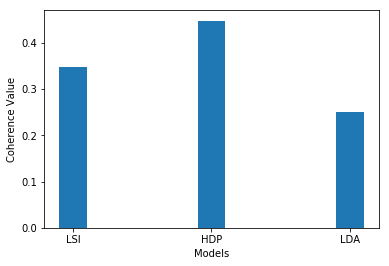

In [34]:
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])